In [4]:
import pickle
from datetime import datetime,timezone,timedelta
import pickle

import numpy as np
import matplotlib.pyplot as plt

import lib_import_other_datasource as imoda

## compare rotated and leveled antennas

mean leveled:284.58757656931186
std leveled:0.11817425487146233
mean rotated:284.5473740777624
std rotated:0.05948891820409636


/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['1'] = float(index['antenne1'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['r'] = float(index['antenne2r'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datasource.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ante_h['1'] = float(index['antenne1'])
/Users/yuziqing/Library/CloudStorage/OneDrive-个人/Studium/MA/gnss_ir_analyze/src/lib_import_other_datas

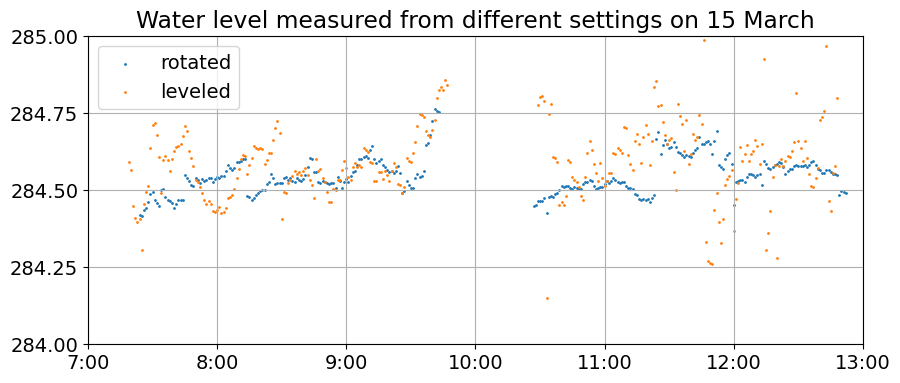

In [5]:
with open('../data/generated_data/kapitel4/compare/timeseries0315_ele5_50_azi265_340_time30.pkl', 'rb') as f:
    ts_dict = pickle.load(f)
plt.rcParams.update({'font.size': 14})

datekey = '0315-1'
ante_h_1 = imoda.get_antenne_height(datekey)
datekey = '0315-2'
ante_h_2 = imoda.get_antenne_height(datekey)

tbegin = datetime(year=2023,month=3,day=15,hour=7,minute=00,second=0,tzinfo=timezone.utc)
tticklist = [tbegin]
for i in range(1,7):
    tticklist.append(tticklist[i-1]+timedelta(minutes=60))

ts_0315_r1 = ts_dict['ts']['0315_r1']
ts_0315_r2 = ts_dict['ts']['0315_r2']
ts_0315_11 = ts_dict['ts']['0315_11']
ts_0315_12 = ts_dict['ts']['0315_12']

time_rotate = list(ts_0315_r1.keys()) + list(ts_0315_r2.keys())
height_rotate_1 = ante_h_1['1'] - 0.20 - np.asarray(list(ts_0315_r1.values()))
height_rotate_2 = ante_h_2['1'] - 0.20 - np.asarray(list(ts_0315_r2.values()))
height_rotate = np.concatenate([height_rotate_1,height_rotate_2])

time_stand = list(ts_0315_11.keys()) + list(ts_0315_12.keys())
height_stand_1 = ante_h_1['1'] - np.asarray(list(ts_0315_11.values()))
height_stand_2 = ante_h_2['1'] - np.asarray(list(ts_0315_12.values()))
height_stand = np.concatenate([height_stand_1,height_stand_2])

fig,ax = plt.subplots()
fig.set_size_inches(10,4)

ax.scatter(time_rotate,height_rotate,s=1)
ax.scatter(time_stand,height_stand,s=1)
ax.legend(['rotated','leveled'])
ax.set_title('Water level measured from different settings on 15 March')
ax.set_ylim([284,285])
ax.set_xlim([tticklist[0],tticklist[-1]])
ax.grid()
ax.legend(['rotated','leveled'])
ax.set_xticks(tticklist)
ax.set_yticks([284,284.25,284.5,284.75,285])
ax.set_xticklabels(['7:00','8:00','9:00','10:00','11:00','12:00','13:00'])
fig.savefig('../../write/bilder/kapitel4/ts_level_rotate.png')

mean_leveled = np.nanmean(height_stand)
std_leveled = np.nanstd(height_stand)
mean_rotated = np.nanmean(height_rotate)
std_rotated = np.nanstd(height_rotate)
print(f'mean leveled:{mean_leveled}')
print(f'std leveled:{std_leveled}')
print(f'mean rotated:{mean_rotated}')
print(f'std rotated:{std_rotated}')